# Linear Regression and Least Squares
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables. In this section we'll use an example data set (or measurements set) to explain the concept.

In this case have a set of measurements that relate the slope of a beach with the dimension of the sand's grains. Using the provided measurements, we'd like to find a general (analytical) relationship between variables (slope and size) in such a way we can predict the sand's grains size for every measured slope.

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('Data/SandDiamVsSlope.csv')
df

,X,Y
0,0.63,0.170
1,0.70,0.190
2,0.82,0.220
3,0.88,0.235
4,1.15,0.235
5,1.50,0.300
6,4.40,0.350
7,7.30,0.420
8,11.30,0.850


Here above you can see the content of the data set. The X column reports the size of each grain of sand, while the Y colums reports the corresponding slope of the beach. In general, we define as $m$ the size of the dataset (or the number of measurements). In this case $m$ = 9. 

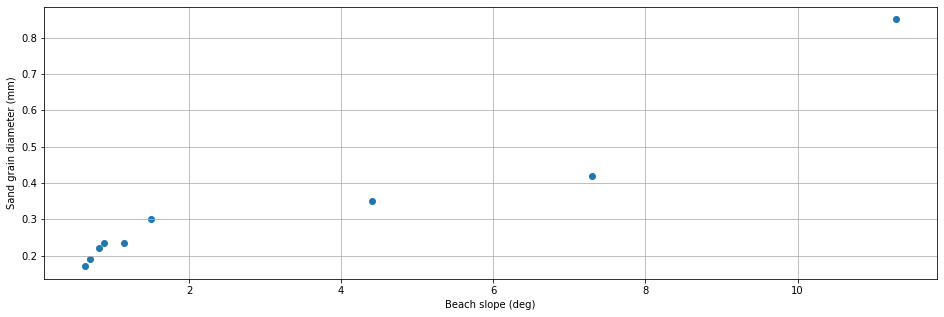

In [197]:
dataArray = df.to_numpy()
xSeries = dataArray[:,0]
ySeries = dataArray[:,1]
f = plt.figure(figsize=(16,5))
ax1 = f.add_subplot(111)
ax1.grid(True)
plt.xlabel("Beach slope (deg)")
plt.ylabel("Sand grain diameter (mm)")
plot = ax1.scatter(xSeries, ySeries)


Here above the data are plotted for visual representation. We'd like to desing an analytical model that is able to estimate the diameter of sand's grains as continuous function of the beach slope. In other words, we'd like to define a function $ h\left ( \theta  \right ):x\rightarrow y $  so that $ h\left ( x \right )$ is a “good” predictor for the corresponding value of y (regression). The most common form of regression is **linear regression**, where the function is expresses as linear combination of the independend variable (i.e. a polinomial function).

The most simple model we can use is the straight line equation:

## $$ h\left ( x \right ) = \theta_{_{0}}+\theta_{_{1}}x $$

This model has only two states ($ \theta_{_{0}} $ and $ \theta_{_{1}} $), that are not depending from x. The challenge consists in finding the values of those two states that best estimate which will be the value of y (sand grain diameter) for any value of x (the slope of the beach).

### Cost Function

Since our objective is to get the best possible line, a good idea would be to rank each possible line accordingly with its $ \theta_{_{0}} $ and $ \theta_{_{1}} $ value. The rank can be based on the average squared vertical distances of the scattered points from the line will be the least. Ideally, if the line would pass through all the points of our training data set, the value of the cost function will be 0. We'll use the function below as **cost function**:
 ### $$ J\left ( \theta _{0},\theta _{1} \right )=\frac{1}{2m}\sum_{i=1}^{m}\left ( h_{\vartheta }\left ( x_{i} \right )-y_{i} \right )^{^{2}} $$
 
  We'd like to find the value of $ \theta_{_{0}} $ and $ \theta_{_{1}} $ that minimize it. In other words, We are trying to define a straight line (defined by $h\left ( \theta  \right )$) which passes through the scattered data points representing our measurements and most closely fits the data.

Cost function value is:0.22249323261015588


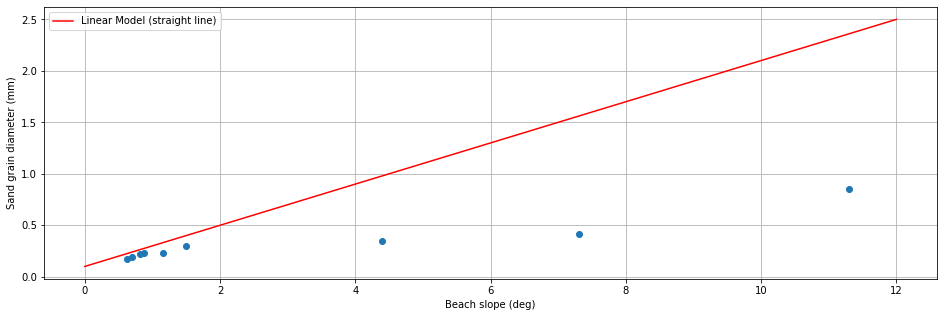

In [8]:
### choose a value for theta0 and theta1 here below ###
theta0 = 0.1
theta1 = 0.2

# calculate J (the cost related to theta0 and theta1)
def CostFunction(_theta0, _theta1):
    m = len(xSeries)
    J = 0
    for k in range(m):
        J = J + pow((_theta0 + _theta1 * xSeries[k]) - ySeries[k],2)
    return J / (2 * m)
    
J = CostFunction(theta0, theta1)
print('Cost function value is:' + str(J) )


# draw the data scatter plot and the analytical model we implemented (a straight line with theta0 and theta1 as coefficients)
f = plt.figure(figsize=(16,5))
ax1 = f.add_subplot(111)
ax1.grid(True)
plt.xlabel("Beach slope (deg)")
plt.ylabel("Sand grain diameter (mm)")
plot = ax1.scatter(xSeries, ySeries)
x = np.linspace(0,12,2)
y = theta0 + theta1 * x
plot = plt.plot(x, y, '-r', label='Linear Model (straight line)')
legend = plt.legend()

As you can see, a change in the values of $ \theta_{_{0}} $ and $ \theta_{_{1}} $ will result in a change in the value of the cost function.
This is visible even better from the figure below, representing the cost assoociated to different values of the states. Obviously, the cost function $ J\left ( \theta _{0},\theta _{1} \right ) $ would be zero if the line passed through all points

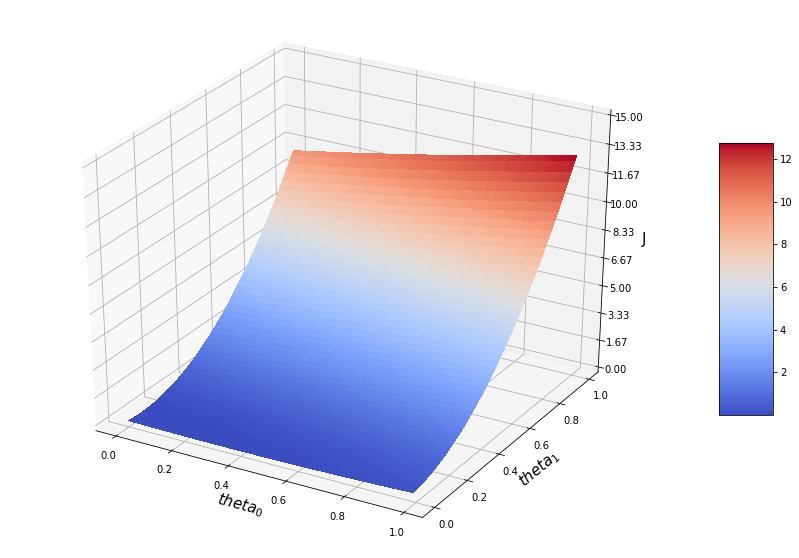

In [6]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (15, 10))

# Make data.
theta0 = np.arange(0, 1, 0.01)
theta1 = np.arange(0, 1, 0.01)


xMesh, yMesh = np.meshgrid(theta0, theta1)
#J = np.zeros((len(theta0), len(theta1)), dtype=float)


def CostFunction(_theta0, _theta1):
    m = len(xSeries)
    J = 0
    for k in range(m):
        J = J + pow((_theta0 + _theta1 * xSeries[k]) - ySeries[k],2)
    return J / (2 * m)



# Plot the surface.
surf = ax.plot_surface(xMesh, yMesh, CostFunction(xMesh, yMesh), cmap=cm.coolwarm, linewidth=0, antialiased=False, label='Cost Function')
ax.set_xlabel('$theta _{0}$', fontsize=15, rotation=150)
ax.set_ylabel('$theta _{1}$', fontsize=15, rotation=60)
ax.set_zlabel('J', fontsize=15, rotation=0)
# Customize the z axis.
ax.set_zlim(0, 15)
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

The problem of finding the values of $ \theta_{_{0}} $ and $ \theta_{_{1}} $ that minimize the cost function $J$ can be solved both numerically (for exaple with a **gradient descent** algorithm) or using the **Least Squares approach**, that allows to calculate the states analytically. The main advantage of the latter approach is that we don't need to iterate a numerical process many times to get the result. We'll only discuss the least square aproach because this is the one that is normally used in orbit determination.

In order to do that, we first need to generalize the problem. For linear systems, we can write a generic model as

### $$ h\left ( x \right ) = \theta_{_{0}}+\theta_{_{1}}x_{1}+...+\theta_{_{n}}x_{_{n}} $$

, being $n$ the number of measurement type we'd like to use as input (in our example, $n$=1 - slope of the beach).

In matrix form the model can be written as:
### $$H=\Theta ^{T}X$$

, where $$X = \begin{bmatrix}
1 & x_{11} & ... & x_{1n}\\ 
1 & x_{21} & ... & x_{2n} \\ 
... & ... & ... & ...\\ 
1 & x_{m1} & ... & x_{mn}
\end{bmatrix}$$

and 
#### $$\Theta = \begin{bmatrix}
\theta _{0} & \theta _{1} & ... & \theta _{n}
\end{bmatrix}$$
, being $m$ the number of measurement ($m$ = 9 in our example). We can also write the list of measurements we'd like to use as output:

#### $$Y=\begin{bmatrix}
y_{1}\\ 
y_{2}\\ 
...\\ 
y_{m}\\ 
\end{bmatrix}$$

$\Theta$ contains the $n$ + 1 unknowns of the system. It can be demonstrated that to find them we can apply the formula:
    
## $$ \Theta = \left ( X^{T}X \right )^{^{-1}}X^{^{T}}Y $$

This is knonw as  **normal equation** and is typically used in the Least Squares approach. Let's see how to implement this process.

In [12]:
# Define the X matrix
X=np.array([np.ones(len(xSeries)),xSeries.flatten()]).T
X

array([[ 1.        ,  0.63      ],
       [ 1.        ,  0.69999999],
       [ 1.        ,  0.81999999],
       [ 1.        ,  0.88      ],
       [ 1.        ,  1.14999998],
       [ 1.        ,  1.5       ],
       [ 1.        ,  4.4000001 ],
       [ 1.        ,  7.30000019],
       [ 1.        , 11.30000019]])

In [20]:
# define the Y vector
Y = ySeries.T
Y

array([0.17      , 0.19      , 0.22      , 0.235     , 0.235     ,
       0.30000001, 0.34999999, 0.41999999, 0.85000002])

In [24]:
# Using Normal Equation.
theta_best_values=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
 
bestTheta0 = theta_best_values[0]
bestTheta1 = theta_best_values[1]
print('Best Theta0 = ' + str(bestTheta0)) 
print('Best Theta1 = ' + str(bestTheta1)) 

Best Theta0 = 0.16091349533076826
Best Theta1 = 0.053060618325608225


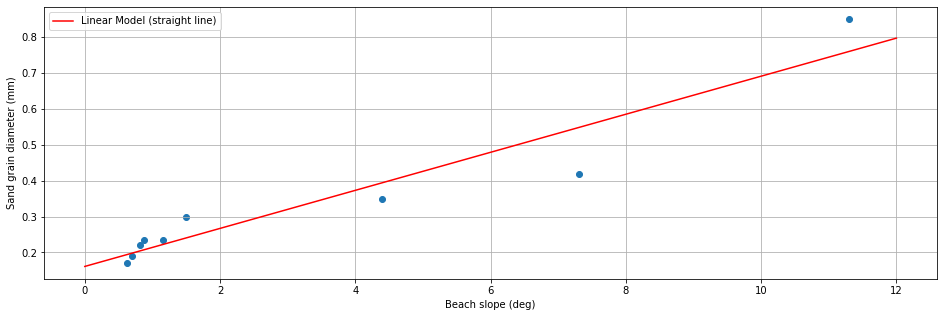

In [23]:
# draw the data scatter plot and the analytical model with the best thetas we found
f = plt.figure(figsize=(16,5))
ax1 = f.add_subplot(111)
ax1.grid(True)
plt.xlabel("Beach slope (deg)")
plt.ylabel("Sand grain diameter (mm)")
plot = ax1.scatter(xSeries, ySeries)
x = np.linspace(0,12,2)
y = bestTheta0 + bestTheta1 * x
plot = plt.plot(x, y, '-r', label='Linear Model (straight line)')
legend = plt.legend()